# Inspecting the dataset

Let's first load our challenge dataset. We will download the data from the Kaggle website and load it using a pandas dataframe:

In [274]:
import pandas as pd
loan_dataset= pd.read_csv("../datasets/loan.csv")
loan_dataset.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,minority-yes,male,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,default-yes,MZ10CD
1,minority-yes,male,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,default-yes,MZ10CD
2,minority-yes,male,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,default-yes,MZ10CD
3,minority-yes,male,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,default-yes,MZ10CD
4,minority-yes,male,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,default-yes,MZ10CD


## Let's describe the variables in our dataset:

In [275]:
loan_dataset.describe()

,rent,education,age,income,loan_size,payment_timing,year,job_stability
count,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.00000,480000.000000
mean,0.474990,26.021746,42.986927,96223.628123,5005.001956,2.999743,14.50000,45.993240
std,0.499375,24.549403,14.426379,91722.295324,2887.151223,1.000970,8.65545,45.072000
min,0.000000,0.002336,18.000059,7.311613,0.043818,-12.463088,0.00000,0.005395
25%,0.000000,1.680126,30.465951,6181.591559,2503.583897,2.615404,7.00000,1.671442
50%,0.000000,20.281134,42.996289,70380.187806,5008.803098,3.307469,14.50000,31.241399
75%,1.000000,49.707804,55.466158,183477.240519,7503.316593,3.712350,22.00000,89.451288
max,1.000000,89.305327,67.999967,350173.898532,9999.994862,4.000000,29.00000,149.914946


In [276]:
# What are the columns in our dataset and what are the types
loan_dataset.dtypes

minority           object
sex                object
ZIP                object
rent                int64
education         float64
age               float64
income            float64
loan_size         float64
payment_timing    float64
year                int64
job_stability     float64
default            object
occupation         object
dtype: object

## Let's define which features of the dataset are numerical and which categorical:

##### We know that minority, sex and rent are categorical variables, let' set them to be

In [277]:
from pandas.api.types import is_numeric_dtype
loan_dataset["minority"] = loan_dataset["minority"].astype("object")
loan_dataset["sex"] = loan_dataset["sex"].astype("object")
loan_dataset["default"] = loan_dataset["default"].astype("object")
loan_dataset["rent"] = loan_dataset["rent"].astype("object")
categorical_dataset = (loan_dataset.select_dtypes(include=["object", "bool"]))
categorical_features = list(categorical_dataset.columns)
numeric_features = list(loan_dataset.drop(categorical_features, axis=1).columns)

In [278]:
for cat in categorical_features:
    loan_dataset[cat] = loan_dataset[cat].astype("object")

In [279]:
# Let's check the data types again
loan_dataset.dtypes

minority           object
sex                object
ZIP                object
rent               object
education         float64
age               float64
income            float64
loan_size         float64
payment_timing    float64
year                int64
job_stability     float64
default            object
occupation         object
dtype: object

In [280]:
# plotting related
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.3)                                                  
# plt.figure(figsize=(3.1, 3)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 

nrows = int(len(numeric_features)/2)
ncols = 3

# Create an array with the colors you want to use
# Set your custom color palette
all_colors = ["#F14F4D", "#FFAB1B", "#F4EA77", "#89C63D", "#29A9E6", "#4B378E"]
sns.set_palette(sns.color_palette(all_colors))

## Continuous variables by Sex: Men has higher education than woman

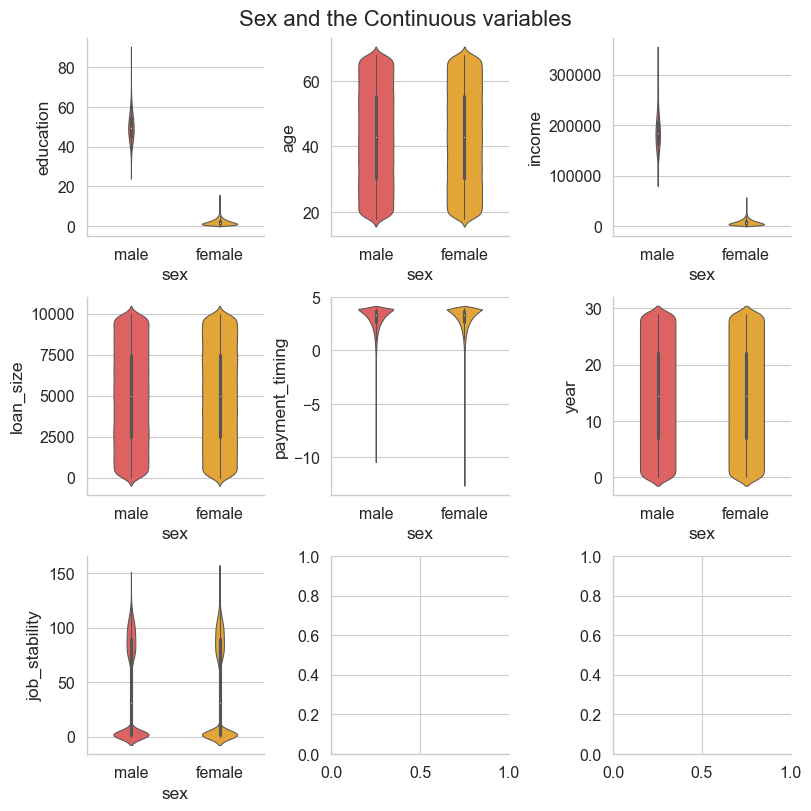

In [281]:
# Set your custom color palette
colors = ["#F14F4D", "#FFAB1B"]
sns.set_palette(sns.color_palette(colors))
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 8), constrained_layout=True)
fig.suptitle("Sex and the Continuous variables", fontsize=16)
axes = axes.flatten()
for c, num_col in enumerate(numeric_features):
    sns.violinplot(x="sex", y=num_col, data=loan_dataset, 
                   width=0.4, ax=axes[c],
                   linewidth=0.75)
    sns.despine()

## Continuous variables by Minority: Minorities have lower job stability than non-minorities

In [282]:
loan_dataset.groupby("minority").mean()

,education,age,income,loan_size,payment_timing,year,job_stability
minority,,,,,,,
minority-no,26.004133,43.005323,96153.156204,5001.262974,2.998046,14.502538,89.863856
minority-yes,26.039383,42.968505,96294.198185,5008.746145,3.001442,14.497459,2.061528


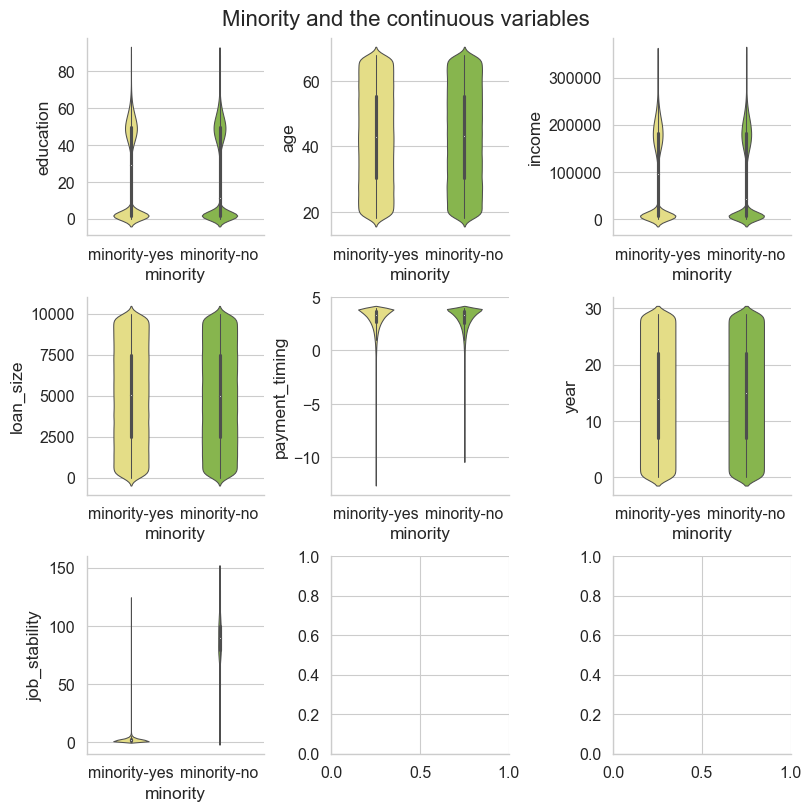

In [283]:
# Set your custom color palette
colors = ["#F4EA77", "#89C63D"]
sns.set_palette(sns.color_palette(colors))
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 8), constrained_layout=True)
fig.suptitle("Minority and the continuous variables", fontsize=16)
axes = axes.flatten()
for c, num_col in enumerate(numeric_features):
    sns.violinplot(x="minority", y=num_col, data=loan_dataset, 
                ax=axes[c], width=0.4,
                showfliers=False,
                linewidth=0.75)
    sns.despine()

## Default and the continuous variables: Not having job stability is associated with default

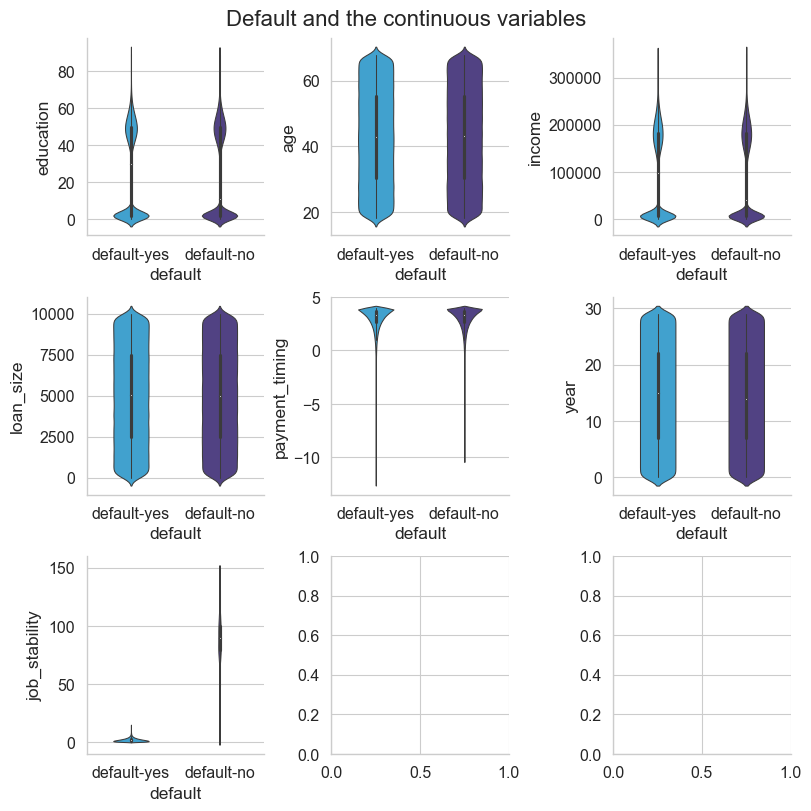

In [284]:
colors = ["#29A9E6", "#4B378E"]
sns.set_palette(sns.color_palette(colors))
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 8), constrained_layout=True)
fig.suptitle("Default and the continuous variables", fontsize=16)
axes = axes.flatten()
for c, num_col in enumerate(numeric_features):
    sns.violinplot(x="default", y=num_col, data=loan_dataset, 
                ax=axes[c], width=0.4,
                showfliers=False,
                linewidth=0.75)
    sns.despine()

## Sex and minority on the continuous variables

In [285]:
loan_dataset.groupby(["minority", "sex"]).mean()

education        age         income    loan_size  \
minority     sex                                                        
minority-no  female   2.008317  43.026059    7425.392529  5001.507555   
             male    50.010942  42.984577  184921.567800  5001.018280   
minority-yes female   2.005400  42.939924    7413.262603  5018.895565   
             male    50.062345  42.997074  185134.377652  4998.601379   

                     payment_timing       year  job_stability  
minority     sex                                               
minority-no  female        2.995500  14.503093      89.845254  
             male          3.000592  14.501982      89.882467  
minority-yes female        2.999595  14.496901       2.051346  
             male          3.003289  14.498016       2.071705

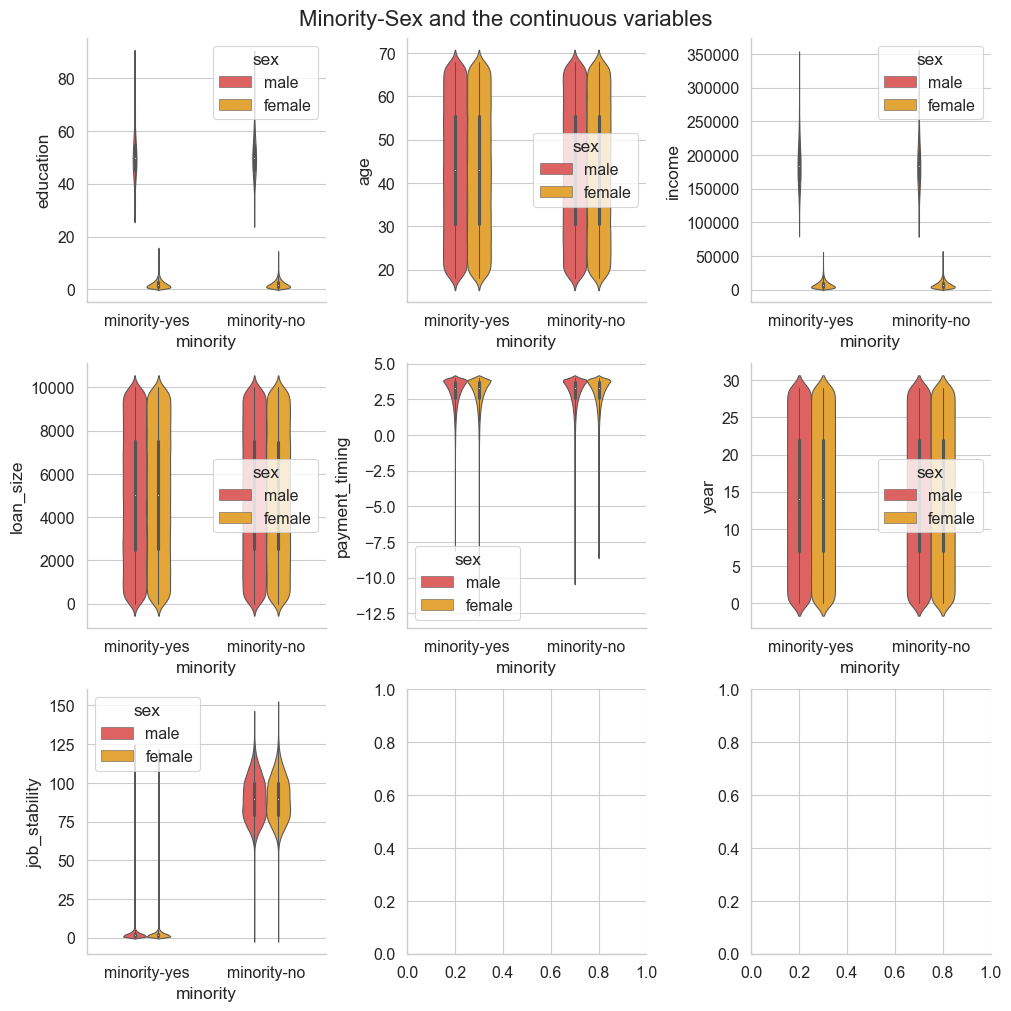

In [286]:
# Create figure
sns.set_palette(sns.color_palette(all_colors))
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Minority-Sex and the continuous variables", fontsize=16)
axes = axes.flatten()
for c, num_col in enumerate(numeric_features):
    # print(c, num_col)
    sns.violinplot(x="minority", y=num_col, hue="sex", data=loan_dataset, 
                ax=axes[c], width=0.4,
                showfliers=False,
                linewidth=0.75)
    sns.despine()

## Default and sex on the continuous variables

In [287]:
loan_dataset.groupby(["default", "sex"]).mean()

education        age         income    loan_size  \
default     sex                                                        
default-no  female   2.007034  43.025587    7420.605674  5002.447015   
            male    50.010503  42.988902  184925.691757  5001.679743   
default-yes female   2.006686  42.940424    7418.059129  5017.949452   
            male    50.062761  42.992742  185130.154384  4997.941045   

                    payment_timing       year  job_stability  
default     sex                                               
default-no  female        2.995448  14.499013      89.927809  
            male          3.000694  14.500000      90.001406  
default-yes female        2.999647  14.500988       1.996508  
            male          3.003186  14.500000       1.993745

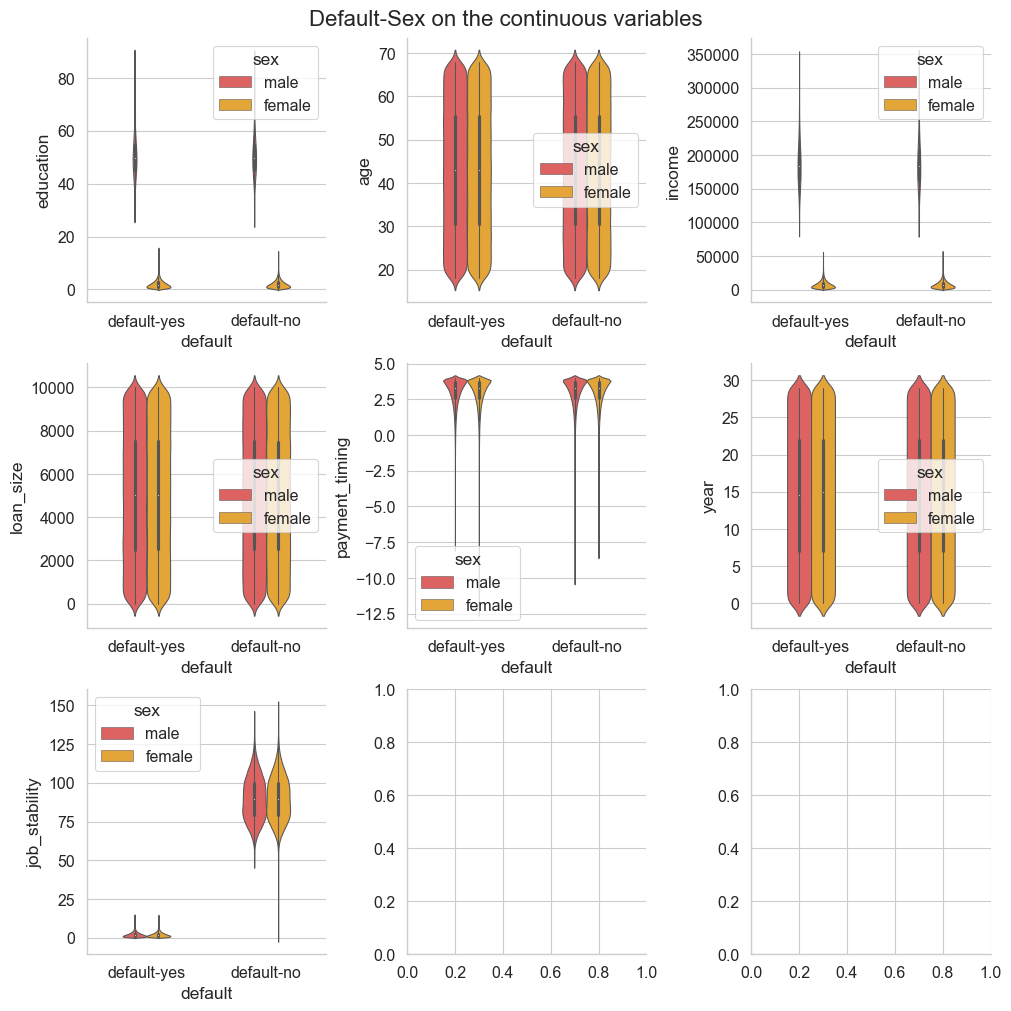

In [288]:
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Default-Sex on the continuous variables", fontsize=16)
axes = axes.flatten()
for c, num_col in enumerate(numeric_features):
    # print(c, num_col)
    sns.violinplot(x="default", y=num_col, hue="sex", data=loan_dataset, 
                ax=axes[c], width=0.4,
                showfliers=False,
                linewidth=0.75)
    sns.despine()

## Visually inspect the effect of default and minority on the continuous variables

In [289]:
loan_dataset.groupby(["default", "minority"]).mean()

education        age        income    loan_size  \
default     minority                                                        
default-no  minority-no   26.006588  43.006108  96162.932297  5001.088832   
            minority-yes  21.188752  44.081464  80373.718905  5918.698388   
default-yes minority-no   24.317544  42.465799  89435.439033  5120.925840   
            minority-yes  26.044546  42.967321  96311.143490  5007.777618   

                          payment_timing       year  job_stability  
default     minority                                                
default-no  minority-no         2.998049  14.496331      89.991727  
            minority-yes        3.017287  17.486275      64.448956  
default-yes minority-no         2.995415  18.767908       1.996569  
            minority-yes        3.001426  14.494277       1.995124

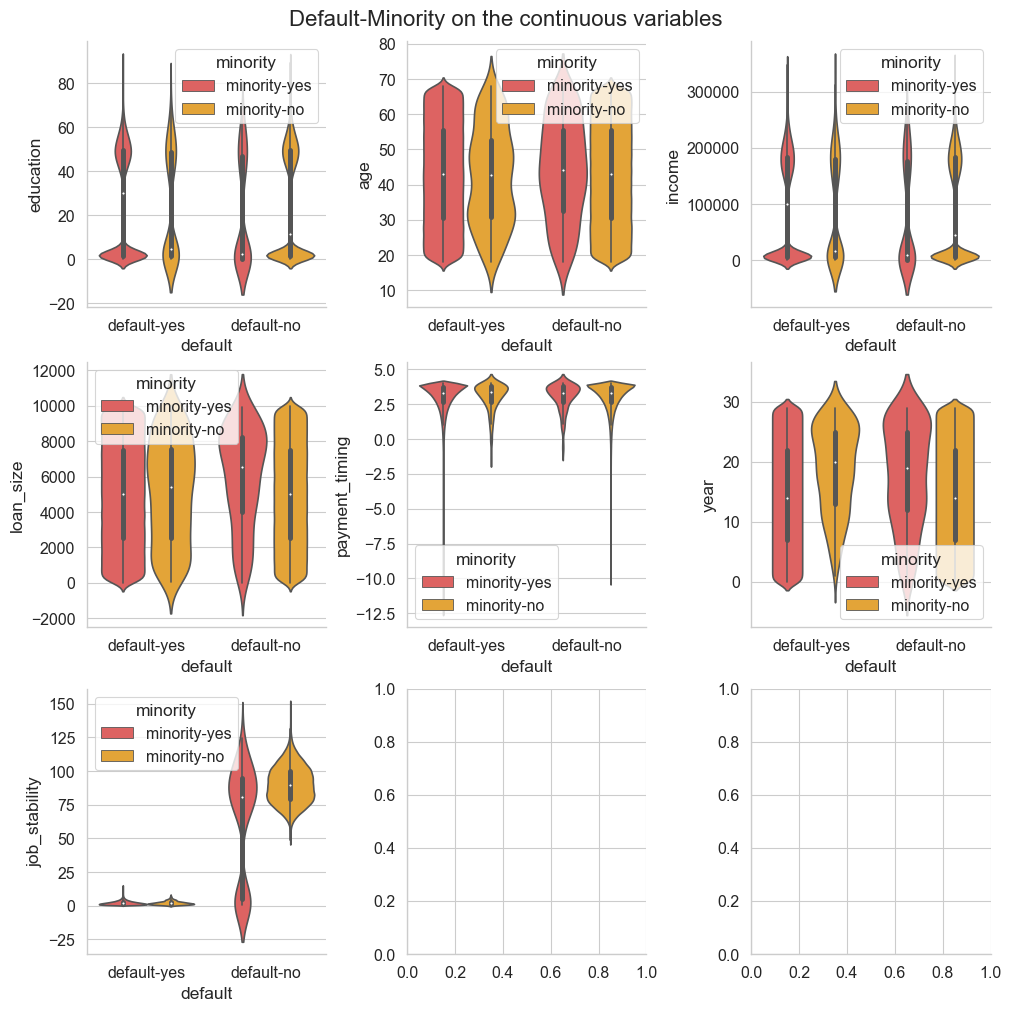

In [290]:
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Default-Minority on the continuous variables", fontsize=16)
axes = axes.flatten()
for c, num_col in enumerate(numeric_features):
    # print(c, num_col)
    sns.violinplot(x="default", y=num_col, hue="minority", data=loan_dataset, ax=axes[c])
    sns.despine()

In [52]:
loan_dataset["default"].value_counts()

False    240073
True     239927
Name: default, dtype: int64

In [53]:
loan_dataset.groupby(["default", "sex", "minority"]).mean()

rent  education        age         income  \
default sex minority                                                  
False   0   0         0.050353  50.011292  42.985940  184924.274386   
            1         0.018692  49.126623  46.307970  186513.850231   
        1   0         0.050974   2.008289  43.026270    7425.274703   
            1         0.479730   0.990426  42.471760    3637.272608   
True    0   0         0.852761  49.753822  41.981884  182930.766412   
            1         0.900682  50.063181  42.994117  185133.145949   
        1   0         0.897849   2.026613  42.889876    7501.361814   
            1         0.898030   2.006655  42.940503    7417.929730   

                        loan_size  payment_timing       year  job_stability  
default sex minority                                                         
False   0   0         5001.120066        3.000629  14.495717      90.001934  
            1         5628.794917        3.072722  19.299065      89.409209  
        1   0         5001.057606        2.995470  14.496944      89.981523  
            1         6128.290763        2.977208  16.175676      46.403367  
True    0   0         4926.150711        2.973243  19.110429       2.009880  
            1         4998.038692        3.003227  14.493729       1.993723  
        1   0         5291.615873        3.014845  18.467742       1.984905  
            1         5017.524351        2.999623  14.494826       1.996526

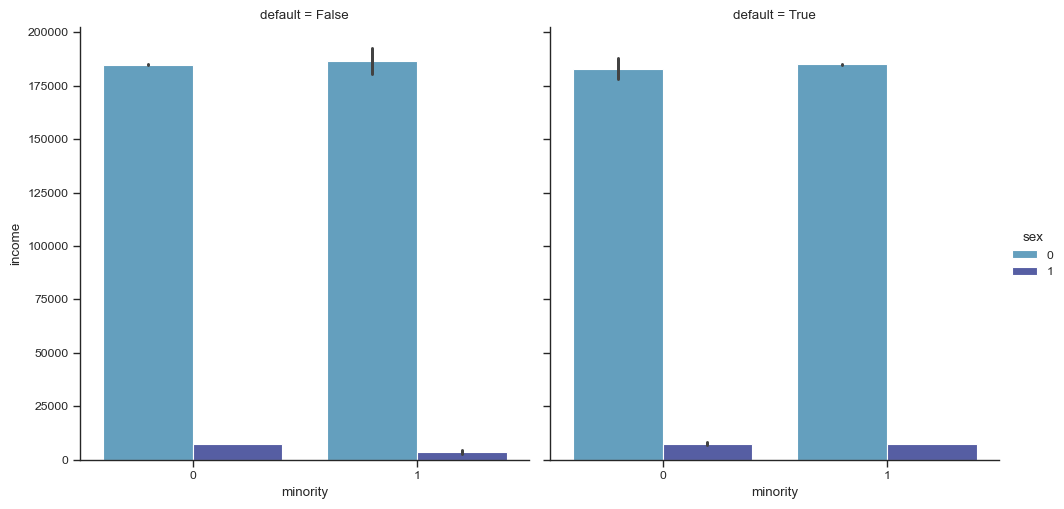

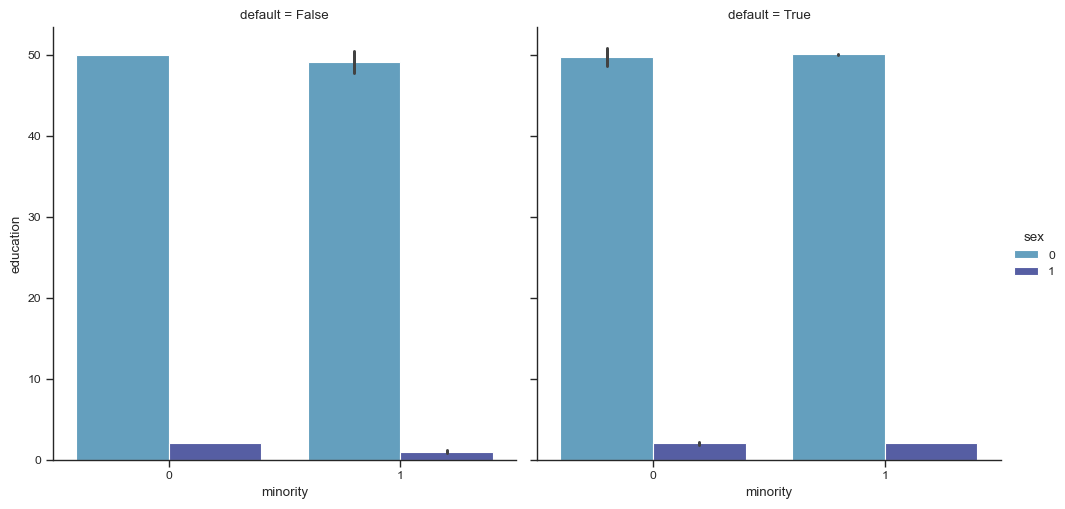

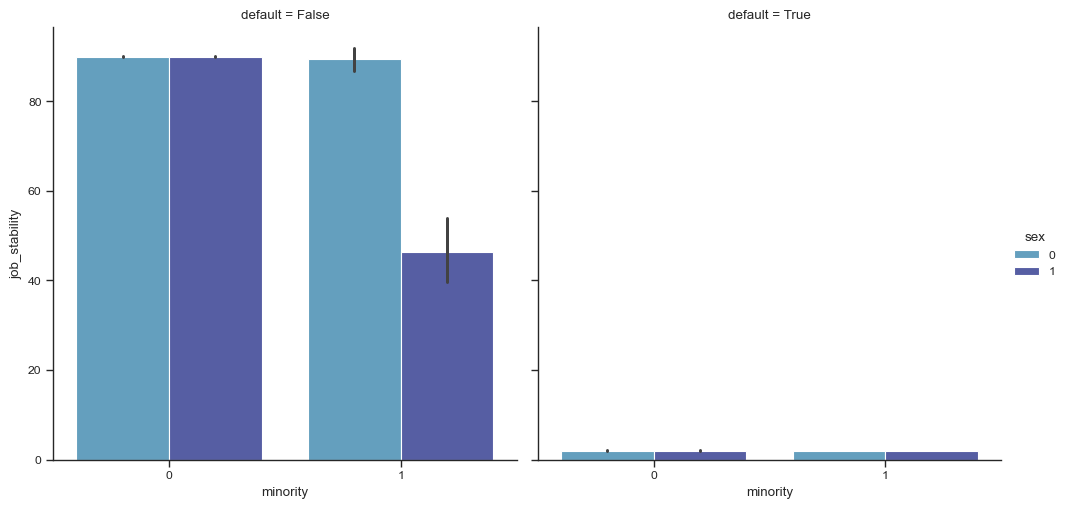

In [54]:
sns.catplot(x="minority", y="income", hue="sex", 
            data=loan_dataset, col="default", kind="bar")
sns.catplot(x="minority", y="education", hue="sex", data=loan_dataset, 
            col="default", kind="bar")
sns.catplot(x="minority", y="job_stability", hue="sex", data=loan_dataset, 
            col="default", kind="bar")

## let's look at the job stability a little bit closer: 

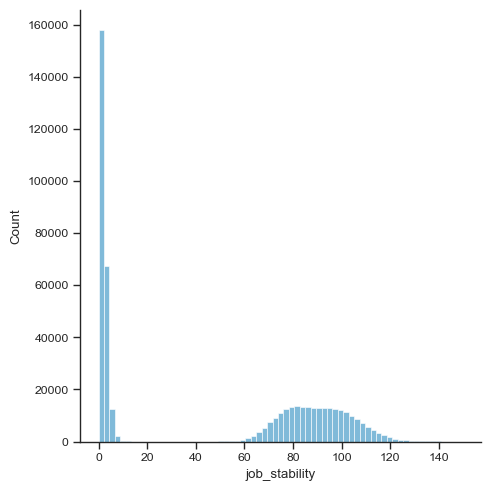

In [55]:
# the distribution of job stability
sns.displot(loan_dataset.job_stability)

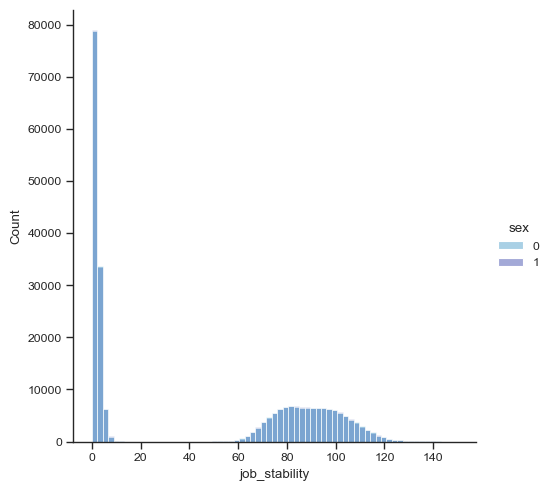

In [56]:
# job stability does not differ by sex
sns.displot(data=loan_dataset, x="job_stability", hue="sex")

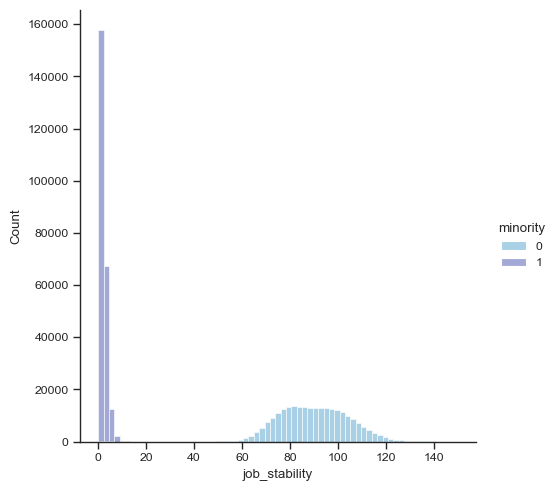

In [57]:
# job stability does not differ by minority
sns.displot(data=loan_dataset, x="job_stability", hue="minority")

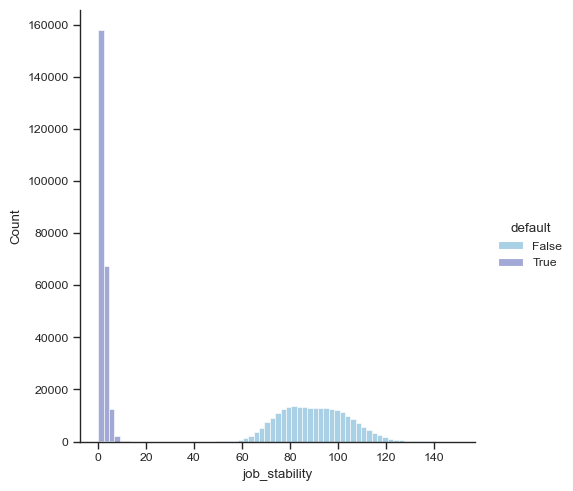

In [58]:
# job stability does not differ by default
sns.displot(data=loan_dataset, x="job_stability", hue="default")

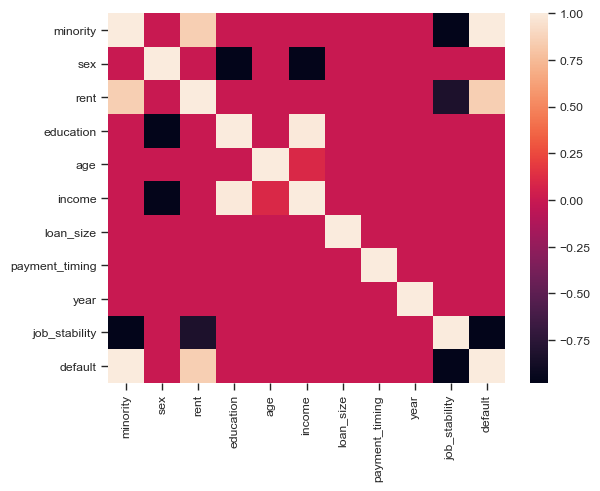

In [59]:
# Are there any correlation between our variables
import seaborn as sns
cor = loan_dataset.corr()
ax = sns.heatmap(cor)

In [ ]:
#pred_grouped = loan_dataset.groupby("sex").mean()
#pred_grouped.index = f"{pred_grouped.index.name}_" + pred_grouped.index.astype(str)



sig education
sig income
sig job_stability
sig job_stability


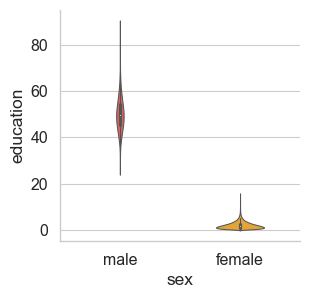

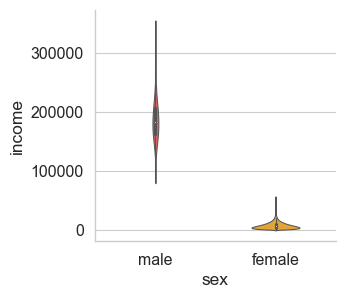

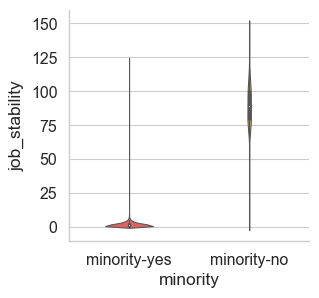

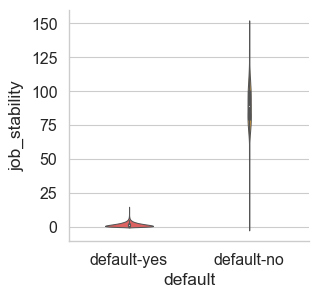

In [267]:
from scipy.stats import ttest_ind
sf = ['sex','minority','default']

for f in sf:
    # significant_features = ['education','income']
    cat1 = dataset[dataset[f] == list(dataset[f].unique())[0]]
    cat2 = dataset[dataset[f] == list(dataset[f].unique())[1]]
    for feature in numeric_features:
        t_test_res = ttest_ind(np.array(cat1[feature]), np.array(cat2[feature]))
        if t_test_res[1] < 0.05:
            print('sig', feature)
            
            plt.figure(figsize=(3.1, 3))
            sns.violinplot(x=f, y=feature, data=dataset,
                            width=0.4,linewidth=0.75)
            sns.despine()